In [2]:
import os
import pandas as  pd 
import gc
import numpy as np
import random
from pathlib import Path
import matplotlib.pyplot as plt

water_body_dir = Path('/media/ds/New Volume/Waterbody_Project/CNN_data/water_body1')
no_water_body_dir = Path('/media/ds/New Volume/Waterbody_Project/CNN_data/no_water_body1')


In [3]:
water_body_l = os.listdir(water_body_dir)
no_water_body_l = os.listdir(no_water_body_dir)
no_water_body_dir_len = len(os.listdir(no_water_body_dir))
water_body_samples = random.sample(water_body_l,no_water_body_dir_len)



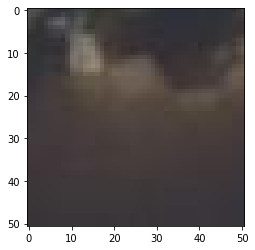

In [4]:
g = plt.imread(water_body_dir.joinpath(water_body_l[7]))
plt.imshow(g)

In [8]:
X = []
y = []

for filename in water_body_samples[:25000]:
    image = plt.imread(water_body_dir.joinpath(filename))
    X.append(image)
    y.append(1)

In [9]:
len(water_body_samples)

87719

In [ ]:
# for some reason water body samples has a few images with different size, so we must remove them

for i in range(len(X)-1):
    if X[i].shape != (51,51,3):
        print(X[i].shape)
        X.pop(i)
        y.pop(i)

In [12]:
for filename in no_water_body_l[:25000]:
    image = plt.imread(no_water_body_dir.joinpath(filename))
    X.append(image)
    y.append(0)

In [13]:
for i in range(len(X)-1):
    if X[i].shape != (51,51,3):
        print(X[i].shape)
        X.pop(i)
        y.pop(i)

(51, 28, 3)
(51, 30, 3)
(51, 28, 3)
(51, 30, 3)
(51, 34, 3)
(51, 34, 3)
(51, 39, 3)
(51, 43, 3)
(51, 31, 3)
(51, 44, 3)
(51, 44, 3)
(51, 45, 3)
(51, 46, 3)
(51, 48, 3)
(51, 41, 3)
(51, 27, 3)
(51, 34, 3)
(51, 26, 3)
(51, 44, 3)
(51, 45, 3)
(51, 25, 3)
(51, 42, 3)
(51, 30, 3)
(51, 48, 3)
(51, 46, 3)
(51, 27, 3)
(51, 35, 3)
(51, 47, 3)
(51, 33, 3)
(51, 34, 3)
(51, 44, 3)
(51, 42, 3)
(51, 44, 3)
(51, 45, 3)
(51, 36, 3)
(51, 50, 3)
(51, 33, 3)
(51, 40, 3)
(51, 45, 3)
(51, 30, 3)
(51, 38, 3)
(51, 47, 3)
(51, 26, 3)
(51, 26, 3)
(51, 36, 3)
(51, 40, 3)
(51, 40, 3)
(51, 38, 3)
(51, 41, 3)
(51, 26, 3)
(51, 33, 3)
(51, 33, 3)
(51, 29, 3)
(51, 40, 3)
(51, 39, 3)
(51, 28, 3)
(51, 29, 3)
(51, 49, 3)
(51, 29, 3)
(51, 35, 3)
(51, 28, 3)
(51, 27, 3)
(51, 35, 3)


IndexError: list index out of range

In [14]:
#X = np.array(X)
#y = np.array(y)

from sklearn.utils import shuffle
X, y = shuffle(X, y)



In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
# check data
import seaborn as sns
del water_body_l
del no_water_body_l
del water_body_samples
gc.collect()


1909

shape of X: (50237, 51, 51, 3)
shape of y: (50237,)


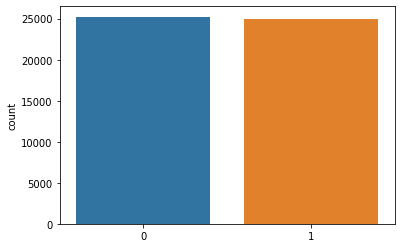

In [17]:

sns.countplot(y)

print('shape of X: {}'.format(X.shape))
print('shape of y: {}'.format(y.shape))


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=66, shuffle=True)



In [19]:
ntrain = len(X_train)
nval = len(X_val)

# we will use a batch size of 32 #NOTE batch size must be factor of 2**x - 2, 4, 8, 16, 32

batch_size = 10

In [20]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


Using TensorFlow backend.


In [21]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (51,51,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu')),

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # dropout for regularisation
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid fu wenction at the end because we have just two classes



In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)        

In [23]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [24]:
#Create the augmentation configuration
# This helps prevent overfitting
train_datagen = ImageDataGenerator(rescale=1./80,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

Val_Datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow(X_train,y_train, batch_size = batch_size)
val_generator = Val_Datagen.flow(X_val, y_val, batch_size=batch_size)

In [26]:
# the training
# We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                                steps_per_epoch=ntrain// batch_size,
                                epochs=80,
                                validation_data=val_generator,
                                validation_steps=nval // batch_size)

Epoch 1/80
4018/4018 [==============================] - 53s 13ms/step - loss: 0.2091 - acc: 0.9231 - val_loss: 1.5262 - val_acc: 0.5330
Epoch 2/80
4018/4018 [==============================] - 58s 15ms/step - loss: 0.1373 - acc: 0.9563 - val_loss: 1.1287 - val_acc: 0.5438
Epoch 3/80
4018/4018 [==============================] - 54s 14ms/step - loss: 0.1293 - acc: 0.9599 - val_loss: 0.4736 - val_acc: 0.5906
Epoch 4/80
4018/4018 [==============================] - 60s 15ms/step - loss: 0.1312 - acc: 0.9607 - val_loss: 1.6522 - val_acc: 0.5968
Epoch 5/80
4018/4018 [==============================] - 54s 13ms/step - loss: 0.1316 - acc: 0.9610 - val_loss: 3.5689 - val_acc: 0.5046
Epoch 6/80
4018/4018 [==============================] - 58s 14ms/step - loss: 0.1347 - acc: 0.9600 - val_loss: 0.0604 - val_acc: 0.6817
Epoch 7/80
4018/4018 [==============================] - 57s 14ms/step - loss: 0.1320 - acc: 0.9594 - val_loss: 0.4240 - val_acc: 0.6610
Epoch 8/80
4018/4018 [==========================

In [ ]:
history